In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
data_train['isTrain'] = True
data_test["isTrain"] = False

In [5]:
traintest = pd.concat([data_train, data_test], axis = 0)

In [6]:
import re
cat_patern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0,9])$")
cont_patern = re.compile("^cont([1-9]|[1-9][0-9]|[1-9][0-9][0,9])$")
cat_col = sorted([cat for cat in traintest.columns if 'cat' in cat], key = lambda s: int(s[3:]))
cat_index = [i for i in range(0, len(traintest.columns)) if cat_patern.match(traintest.columns[i])]
cont_col = sorted([cont for cont in traintest.columns if 'cont' in cont], key = lambda s: int(s[4:]))
cont_index = [i for i in range(0, len(traintest.columns)) if cont_patern.match(traintest.columns[i])]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\meisam\AppData\Local\Temp\ipykernel_10052\4058602619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['loss'])


<AxesSubplot: xlabel='loss', ylabel='Density'>

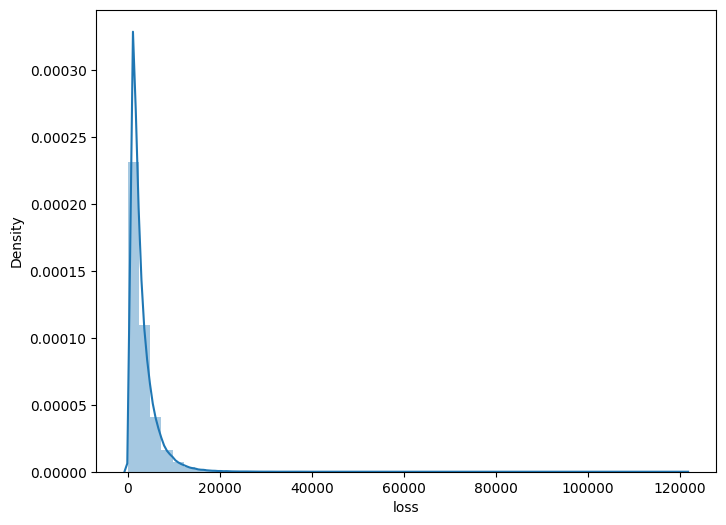

In [10]:
plt.figure(figsize = (8,6))
sns.distplot(data_train['loss'])

C:\Users\meisam\AppData\Local\Temp\ipykernel_10052\921963376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_train['loss']))


<AxesSubplot: xlabel='loss', ylabel='Density'>

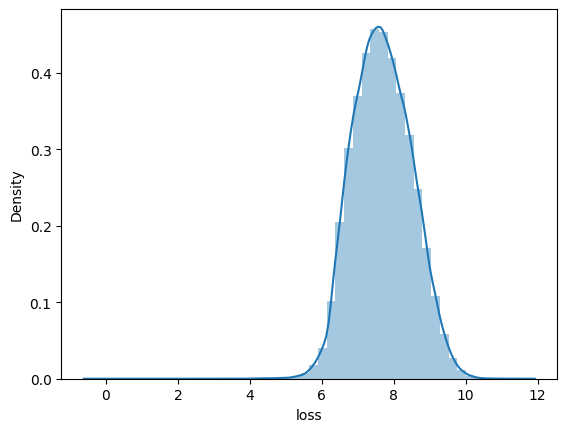

In [11]:
sns.distplot(np.log(data_train['loss']))

In [15]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [16]:
model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10)

In [17]:
X = data_train.drop(['id', 'loss', 'isTrain'], axis=1)
y = np.log(data_train['loss'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
ci = np.asarray(cat_index) - 1

In [24]:
model.fit(X_train, y_train, ci, eval_set=(X_test, y_test))

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=100]="A": Cannot convert 'b'A'' to float